<a href="https://colab.research.google.com/github/Jvargas442/Ciencia-de-datos/blob/main/Trabajofinal_Ciencia_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción
Este informe presenta un análisis de desempeño de un jugador de League of Legends (LoL) perteneciente a la selección de la Universidad, basado en sus estadísticas de juego recientes. A través del uso de herramientas de ciencia de datos en Python, se realiza una exploración descriptiva, comparativa y predictiva que permite identificar patrones de comportamiento y rendimiento en diferentes condiciones de juego. Se presta especial atención al tipo de partida (en dúo o en solitario), al uso de campeones específicos, y a la relación entre variables clave como asesinatos, asistencias, oro por minuto y porcentaje de victorias.

# Índice
## Introducción

## Descripción de los datos

## Análisis estadístico descriptivo


1.   Desempeño general
2.   Comparación dúo vs solo
3. Estadísticas por campeón

## Visualización de datos

1. Histogramas y gráficos de densidad

2. Boxplots y diagramas de barras

## Análisis destacables

1. Winrate por modo de juego
2. Combinaciones efectivas jugador-campeón
3. Indicadores llamativos del rendimiento

In [32]:
!pip install statsmodels


In [33]:
!pip install wquantiles

In [34]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import wquantiles
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
from google.colab import files
uploaded = files.upload()


Saving datos_lol_actualizado (1).xlsx to datos_lol_actualizado (1).xlsx


In [36]:
file_path = "datos_lol_actualizado (1).xlsx"
hojas = pd.ExcelFile(file_path).sheet_names
print("Hojas disponibles en el archivo:", hojas)
df = pd.read_excel(file_path, sheet_name="Sheet1")

Hojas disponibles en el archivo: ['Sheet1']


In [37]:
csv_file_path = "/content/datos_lol_actualizado (1).xlsx"
df.to_csv(csv_file_path, index=False)

print(f"Archivo convertido y guardado como {csv_file_path}")

Archivo convertido y guardado como /content/datos_lol_actualizado (1).xlsx


In [38]:
estado=pd.read_csv("/content/datos_lol_actualizado (1).xlsx")

# Descripción de los datos

In [39]:
estado.head()

,Campeón,KDA,Kills,Deaths,Assists,Kill Participa(%),Wards Coloc,Control Wards,Wards Elimi,Wards por M,Duración(minutos),Daño Infligido,Daño Recibido,Total de Oro,Posición del,Victoria,Duo,Oro por Minuto
0,Lulu,10.00,0,2,20,54.0,26,5,3,0.896552,29,5418,16028,9152,2do Mejor,1,0,315.586207
1,Lulu,15.00,1,1,14,60.0,17,5,2,0.772727,22,4558,6650,6780,3er Mejor,1,1,308.181818
2,Lulu,5.00,1,5,24,68.0,23,6,5,0.884615,26,6683,15600,8771,2do Mejor,1,1,337.346154
3,Leona,1.29,0,7,9,39.0,34,9,11,1.062500,32,7642,28891,7645,10mo Lugar,0,0,238.906250
4,Lulu,3.25,0,4,13,72.0,23,5,2,1.000000,23,3859,11294,6034,2do Mejor,1,1,262.347826


In [40]:
estado.sample(10)


,Campeón,KDA,Kills,Deaths,Assists,Kill Participa(%),Wards Coloc,Control Wards,Wards Elimi,Wards por M,Duración(minutos),Daño Infligido,Daño Recibido,Total de Oro,Posición del,Victoria,Duo,Oro por Minuto
15,Lulu,1.71,2,7,10,57.0,38,7,12,1.117647,34,6797,17072,8779,8vo Lugar,0,0,258.205882
7,Nami,30.00,2,1,28,79.0,32,9,4,1.142857,28,13314,6850,9193,3er Mejor,1,0,328.321429
1,Lulu,15.00,1,1,14,60.0,17,5,2,0.772727,22,4558,6650,6780,3er Mejor,1,1,308.181818
0,Lulu,10.00,0,2,20,54.0,26,5,3,0.896552,29,5418,16028,9152,2do Mejor,1,0,315.586207
22,Swain,12.50,6,2,19,63.0,31,6,6,0.968750,32,23722,28517,10544,2do Lugar,1,1,329.500000
17,Amumu,0.33,0,3,1,13.0,5,3,1,0.454545,11,1398,4486,2325,10mo Lugar,1,0,211.363636
6,Nami,4.20,4,5,17,60.0,43,6,11,0.860000,50,22103,39300,12417,5to Lugar,0,0,248.340000
4,Lulu,3.25,0,4,13,72.0,23,5,2,1.000000,23,3859,11294,6034,2do Mejor,1,1,262.347826
13,Leona,3.67,0,6,22,58.0,25,6,2,1.000000,25,10202,22239,8800,2do Lugar,1,1,352.000000
2,Lulu,5.00,1,5,24,68.0,23,6,5,0.884615,26,6683,15600,8771,2do Mejor,1,1,337.346154


In [41]:
estado.columns

Index(['Campeón', 'KDA', 'Kills', 'Deaths', 'Assists', 'Kill Participa(%)',
       'Wards Coloc', 'Control Wards', 'Wards Elimi', 'Wards por M',
       'Duración(minutos)', 'Daño Infligido', 'Daño Recibido', 'Total de Oro',
       'Posición del', 'Victoria', 'Duo', 'Oro por Minuto'],
      dtype='object')

In [42]:
estado.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Campeón            27 non-null     object 
 1   KDA                27 non-null     float64
 2   Kills              27 non-null     int64  
 3   Deaths             27 non-null     int64  
 4   Assists            27 non-null     int64  
 5   Kill Participa(%)  27 non-null     float64
 6   Wards Coloc        27 non-null     int64  
 7   Control Wards      27 non-null     int64  
 8   Wards Elimi        27 non-null     int64  
 9   Wards por M        27 non-null     float64
 10  Duración(minutos)  27 non-null     int64  
 11  Daño Infligido     27 non-null     int64  
 12  Daño Recibido      27 non-null     int64  
 13  Total de Oro       27 non-null     int64  
 14  Posición del       27 non-null     object 
 15  Victoria           27 non-null     int64  
 16  Duo                27 non-nu

In [43]:
estado.describe()

,KDA,Kills,Deaths,Assists,Kill Participa(%),Wards Coloc,Control Wards,Wards Elimi,Wards por M,Duración(minutos),Daño Infligido,Daño Recibido,Total de Oro,Victoria,Duo,Oro por Minuto
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,5.617778,3.148148,4.777778,14.444444,54.296296,29.185185,6.259259,6.851852,0.924861,30.111111,13203.888889,19725.888889,8921.111111,0.555556,0.592593,291.017193
std,6.297809,4.873032,2.900044,7.772404,18.718183,10.759743,2.379279,4.904501,0.236961,9.471956,13480.307787,9423.097345,3500.372006,0.506370,0.500712,53.819205
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,382.000000,526.000000,968.000000,0.000000,0.000000,193.600000
25%,1.690000,0.000000,2.500000,9.500000,49.500000,24.500000,5.000000,3.000000,0.883484,27.000000,6740.000000,13670.000000,7332.000000,0.000000,0.000000,250.970238
50%,4.200000,2.000000,5.000000,14.000000,58.000000,31.000000,6.000000,6.000000,0.968750,30.000000,10202.000000,20854.000000,8800.000000,1.000000,1.000000,287.821429
75%,6.000000,4.000000,7.000000,21.500000,63.000000,34.000000,7.500000,10.500000,1.031250,34.000000,12990.500000,26732.500000,9980.000000,1.000000,1.000000,321.953818
max,30.000000,23.000000,13.000000,28.000000,82.000000,45.000000,11.000000,19.000000,1.250000,51.000000,68049.000000,39300.000000,20669.000000,1.000000,1.000000,405.274510


# Análisis estadístico descriptivo

In [44]:
prom_kda=df[df['Victoria'] == 1]['KDA'].mean()
prom_kda

np.float64(8.431999999999999)

In [45]:
wr_duo = df[df['Duo'] == 1]['Victoria'].mean()
wr__solo = df[df['Duo'] == 0]['Victoria'].mean()

wr_duo, wr__solo


(np.float64(0.75), np.float64(0.2727272727272727))

In [46]:
k_duo = df[df['Duo'] == 1]['Kills'].mean()
k_solo = df[df['Duo'] == 0]['Kills'].mean()

k_duo, k_solo

(np.float64(4.5), np.float64(1.1818181818181819))

In [47]:
a_duo = df[df['Duo'] == 1]['Assists'].mean()
a_solo = df[df['Duo'] == 0]['Assists'].mean()

a_duo, a_solo

(np.float64(16.6875), np.float64(11.181818181818182))

In [48]:
d_duo = df[df['Duo'] == 1]['Deaths'].mean()
d_solo = df[df['Duo'] == 0]['Deaths'].mean()

d_duo, d_solo

(np.float64(4.25), np.float64(5.545454545454546))

In [49]:
kp_duo = df[df['Duo'] == 1]['Kill Participa(%)'].mean()
kp_solo = df[df['Duo'] == 0]['Kill Participa(%)'].mean()

kp_duo, kp_solo

(np.float64(60.5), np.float64(45.27272727272727))

In [50]:
o_duo = df[df['Duo'] == 1]['Total de Oro'].mean()
o_solo = df[df['Duo'] == 0]['Total de Oro'].mean()

o_duo, o_solo

(np.float64(10094.1875), np.float64(7214.818181818182))

In [51]:
pk_lulu = df[df['Campeón'] == 'Lulu']['Kills'].mean()
pa_lulu = df[df['Campeón'] == 'Lulu']['Assists'].mean()
pd_lulu = df[df['Campeón'] == 'Lulu']['Deaths'].mean()
pk_lulu, pa_lulu, pd_lulu


(np.float64(1.0), np.float64(14.25), np.float64(3.25))

In [52]:
pk_mel = df[df['Campeón'] == 'Mel']['Kills'].mean()
pa_mel = df[df['Campeón'] == 'Mel']['Assists'].mean()
pd_mel = df[df['Campeón'] == 'Mel']['Deaths'].mean()
pk_mel, pa_mel, pd_mel


(np.float64(11.0), np.float64(10.25), np.float64(5.25))

In [53]:
pk_leona = df[df['Campeón'] == 'Leona']['Kills'].mean()
pa_leona = df[df['Campeón'] == 'Leona']['Assists'].mean()
pd_leona = df[df['Campeón'] == 'Leona']['Deaths'].mean()
pk_leona, pa_leona, pd_leona


(np.float64(1.25), np.float64(12.5), np.float64(7.0))

In [54]:
wr_lulu = df[df['Campeón'] == 'Lulu']['Victoria'].mean()
wr_lulu

np.float64(0.625)

In [55]:
wc_lulu= df[df['Campeón'] == 'Lulu']['Wards por M'].mean()
wc_lulu

np.float64(0.8607283943237289)

In [56]:
df['Oro por Minuto'] = df['Total de Oro'] / df['Duración(minutos)']
df[['Total de Oro', 'Duración(minutos)', 'Oro por Minuto']].head()

,Total de Oro,Duración(minutos),Oro por Minuto
0,9152,29,315.586207
1,6780,22,308.181818
2,8771,26,337.346154
3,7645,32,238.906250
4,6034,23,262.347826


In [57]:
file_path_updated = "datos_lol_actualizado.xlsx"
df.to_excel(file_path_updated, index=False)

In [58]:
from google.colab import files
files.download('datos_lol_actualizado.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
om_lulu = df[df['Campeón'] == 'Lulu']['Oro por Minuto'].mean()
om_lulu

np.float64(282.26463671420345)

In [60]:
omd_lulu = df[(df['Campeón'] == 'Lulu') & (df['Duo'] == 1)]['Oro por Minuto'].mean()
wrd_lulu = df[(df['Campeón'] == 'Lulu') & (df['Duo'] == 1)]['Victoria'].mean()
wcd_lulu= df[(df['Campeón'] == 'Lulu') & (df['Duo'] == 1)]['Wards por M'].mean()
omd_lulu, wr_lulu, wcd_lulu


(np.float64(298.145000892827),
 np.float64(0.625),
 np.float64(0.9743256743256744))

In [61]:
pk_lulu = df[(df['Campeón'] == 'Lulu') & (df['Duo'] == 1)]['Kills'].mean()
pa_lulu = df[(df['Campeón'] == 'Lulu') & (df['Duo'] == 1)]['Assists'].mean()
pd_lulu = df[(df['Campeón'] == 'Lulu') & (df['Duo'] == 1)]['Deaths'].mean()
pk_lulu, pa_lulu, pd_lulu

(np.float64(1.2), np.float64(16.8), np.float64(3.4))

In [62]:
omd_leona = df[(df['Campeón'] == 'Leona') & (df['Duo'] == 1)]['Oro por Minuto'].mean()
wrd_leona = df[(df['Campeón'] == 'Leona') & (df['Duo'] == 1)]['Victoria'].mean()
wcd_leona = df[(df['Campeón'] == 'Leona') & (df['Duo'] == 1)]['Wards por M'].mean()
omd_leona, wrd_leona, wcd_leona


(np.float64(352.0), np.float64(1.0), np.float64(1.0))

In [63]:
pk_leona = df[(df['Campeón'] == 'Leona') & (df['Duo'] == 1)]['Kills'].mean()
pa_leona = df[(df['Campeón'] == 'Leona') & (df['Duo'] == 1)]['Assists'].mean()
pd_leona = df[(df['Campeón'] == 'Leona') & (df['Duo'] == 1)]['Deaths'].mean()
pk_leona, pa_leona, pd_leona

(np.float64(0.0), np.float64(22.0), np.float64(6.0))

In [64]:
pk_leona = df[df['Campeón'] == 'Leona']['Kills'].mean()
pa_leona = df[df['Campeón'] == 'Leona']['Assists'].mean()
pd_leona = df[df['Campeón'] == 'Leona']['Deaths'].mean()
pk_leona, pa_leona, pd_leona

(np.float64(1.25), np.float64(12.5), np.float64(7.0))

In [65]:
om_leona = df[df['Campeón'] == 'Leona']['Oro por Minuto'].mean()
wr_leona = df[df['Campeón'] == 'Leona']['Victoria'].mean()
wc_leona = df[df['Campeón'] == 'Leona']['Wards por M'].mean()
om_leona, wr_leona, wc_leona

(np.float64(274.1696428571429), np.float64(0.25), np.float64(1.015625))

In [66]:
pk_mel = df[df['Campeón'] == 'Mel']['Kills'].mean()
pa_mel = df[df['Campeón'] == 'Mel']['Assists'].mean()
pd_mel = df[df['Campeón'] == 'Mel']['Deaths'].mean()
pk_mel, pa_mel, pd_mel


(np.float64(11.0), np.float64(10.25), np.float64(5.25))

In [67]:
om_mel = df[df['Campeón'] == 'Mel']['Oro por Minuto'].mean()
wr_mel = df[df['Campeón'] == 'Mel']['Victoria'].mean()
wc_mel = df[df['Campeón'] == 'Mel']['Wards por M'].mean()
om_mel, wr_mel, wc_mel


(np.float64(347.1328431372549),
 np.float64(0.5),
 np.float64(0.8838235294117647))

In [68]:
pkd_mel = df[(df['Campeón'] == 'Mel') & (df['Duo'] == 1)]['Kills'].mean()
pad_mel = df[(df['Campeón'] == 'Mel') & (df['Duo'] == 1)]['Assists'].mean()
pdd_mel = df[(df['Campeón'] == 'Mel') & (df['Duo'] == 1)]['Deaths'].mean()
pkd_mel, pa_mel, pd_mel


(np.float64(11.0), np.float64(10.25), np.float64(5.25))

In [69]:
omd_mel = df[(df['Campeón'] == 'Mel') & (df['Duo'] == 1)]['Oro por Minuto'].mean()
wrd_mel = df[(df['Campeón'] == 'Mel') & (df['Duo'] == 1)]['Victoria'].mean()
wcd_mel = df[(df['Campeón'] == 'Mel') & (df['Duo'] == 1)]['Wards por M'].mean()
omd_mel, wrd_mel, wcd_mel


(np.float64(347.1328431372549),
 np.float64(0.5),
 np.float64(0.8838235294117647))

# Visualización de datos

<Axes: >

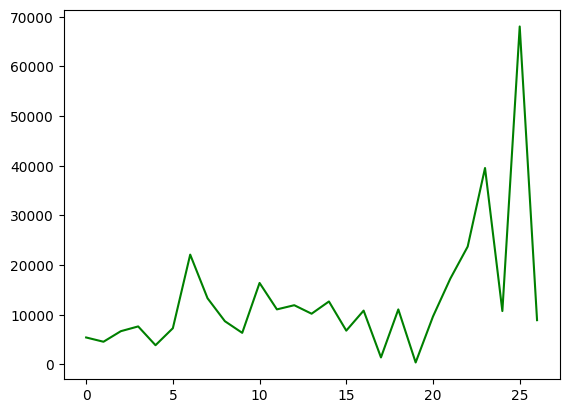

In [70]:
estado["Daño Infligido"].plot.line(color="green")

<Axes: >

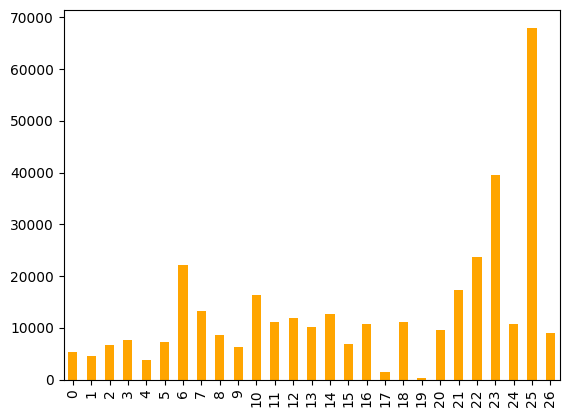

In [71]:
estado["Daño Infligido"].plot.bar(color="orange")

Text(0, 0.5, '# de asistencias')

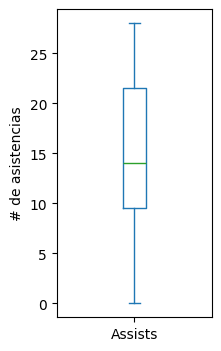

In [72]:
ax=(estado.Assists).plot.box(figsize=(2,4))
ax.set_ylabel("# de asistencias")

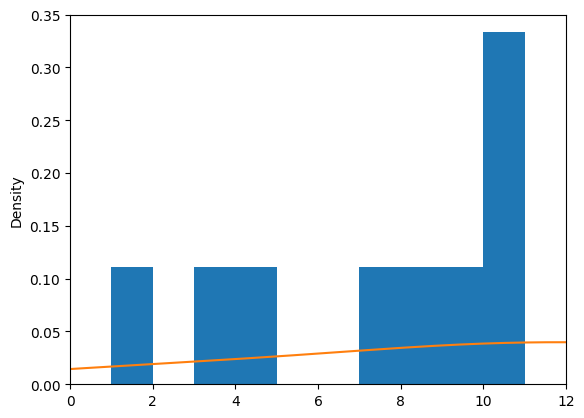

In [73]:
ax=estado["Assists"].plot.hist(density=True,xlim=[0,12],bins=range(1,12))
estado["Assists"].plot.density(ax=ax)
ax.set_label("Asistencias")

Text(0, 0.5, 'Muertes')

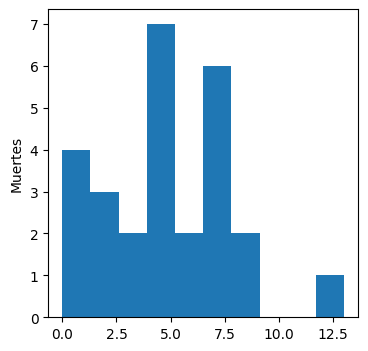

In [74]:
ax = (estado.Deaths).plot.hist(figsize=(4,4))
ax.set_ylabel("Muertes")

# Análisis destacables

In [75]:
solo_kda= df[df['Duo'] == 1]['KDA'].mean()
duo_kda= df[df['Duo'] == 0]['KDA'].mean()
solo_kda, duo_kda


(np.float64(6.188125), np.float64(4.788181818181818))

In [76]:
kda_prom= df['KDA'].mean()
kills_prom= df['Kills'].mean()
assists_prom= df['Assists'].mean()
deaths_prom= df['Deaths'].mean()
kda_prom, kills_prom, assists_prom, deaths_prom

(np.float64(5.617777777777778),
 np.float64(3.1481481481481484),
 np.float64(14.444444444444445),
 np.float64(4.777777777777778))

In [77]:
kdad_prom= df[df['Duo'] == 1]['KDA'].mean()
killsd_prom= df[df['Duo'] == 1]['Kills'].mean()
assistsd_prom= df[df['Duo'] == 1]['Assists'].mean()
deathsd_prom= df[df['Duo'] == 1]['Deaths'].mean()
kdad_prom, killsd_prom, assistsd_prom, deathsd_prom

(np.float64(6.188125), np.float64(4.5), np.float64(16.6875), np.float64(4.25))

In [78]:
wmd_prom= df[df['Duo'] == 1]['Wards por M'].mean()
wmd_prom

np.float64(0.9627439795658306)

In [79]:
duo_counts = df['Duo'].value_counts()

victorias_duo = df[df['Duo'] == 1]['Victoria'].sum()
partidas_duo = df[df['Duo'] == 1].shape[0]

victorias_solo = df[df['Duo'] == 0]['Victoria'].sum()
partidas_solo = df[df['Duo'] == 0].shape[0]

winrate_duo = victorias_duo / partidas_duo
winrate_solo = victorias_solo / partidas_solo

print(f" En modo dúo jugó {partidas_duo} partidas y ganó {victorias_duo}. Winrate: {winrate_duo:.2%}")
print(f" En modo solo jugó {partidas_solo} partidas y ganó {victorias_solo}. Winrate: {winrate_solo:.2%}")

 En modo dúo jugó 16 partidas y ganó 12. Winrate: 75.00%
 En modo solo jugó 11 partidas y ganó 3. Winrate: 27.27%


In [80]:
campeones_jugados = df['Campeón'].value_counts()
print("Campeones más jugados:\n", campeones_jugados)

winrate_por_campeon = df.groupby('Campeón')['Victoria'].mean().sort_values(ascending=False)
print(" Winrate por campeón:\n", winrate_por_campeon)

Campeones más jugados:
 Campeón
Lulu            8
Leona           4
Mel             4
Nami            2
Thresh          2
Renata Glasc    1
Anivia          1
Nautilus        1
Amumu           1
Maokai          1
Swain           1
Rakan           1
Name: count, dtype: int64
 Winrate por campeón:
 Campeón
Amumu           1.000
Swain           1.000
Thresh          1.000
Nautilus        1.000
Renata Glasc    1.000
Lulu            0.625
Mel             0.500
Nami            0.500
Leona           0.250
Anivia          0.000
Maokai          0.000
Rakan           0.000
Name: Victoria, dtype: float64


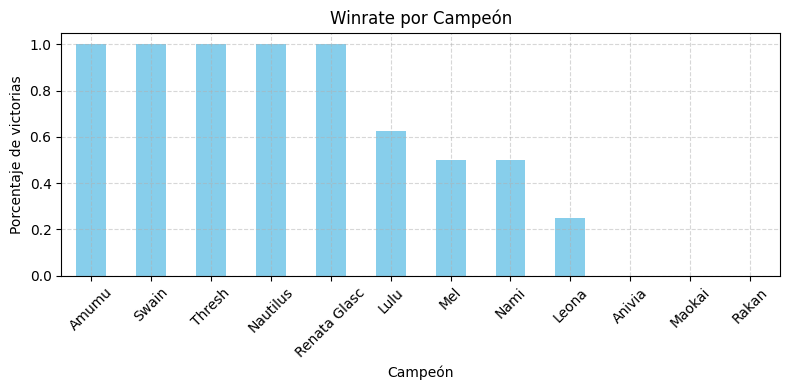

In [81]:
winrate_por_campeon.plot(kind='bar', title='Winrate por Campeón', figsize=(8, 4), color='skyblue')
plt.ylabel("Porcentaje de victorias")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [82]:
lulu_duo = df[(df['Campeón'] == 'Lulu') & (df['Duo'] == 1)]
partidas_lulu_duo = lulu_duo.shape[0]
victorias_lulu_duo = lulu_duo['Victoria'].sum()

print(f"Lulu en dúo: {partidas_lulu_duo} partidas jugadas, {victorias_lulu_duo} victorias.")

Lulu en dúo: 5 partidas jugadas, 4 victorias.


In [83]:

winrate_por_campeon = df.groupby('Campeón')['Victoria'].mean().reset_index()


winrate_por_campeon['Alta_efectividad'] = winrate_por_campeon['Victoria'] > 0.5

print(winrate_por_campeon)

         Campeón  Victoria  Alta_efectividad
0          Amumu     1.000              True
1         Anivia     0.000             False
2          Leona     0.250             False
3           Lulu     0.625              True
4         Maokai     0.000             False
5            Mel     0.500             False
6           Nami     0.500             False
7       Nautilus     1.000              True
8          Rakan     0.000             False
9   Renata Glasc     1.000              True
10         Swain     1.000              True
11        Thresh     1.000              True


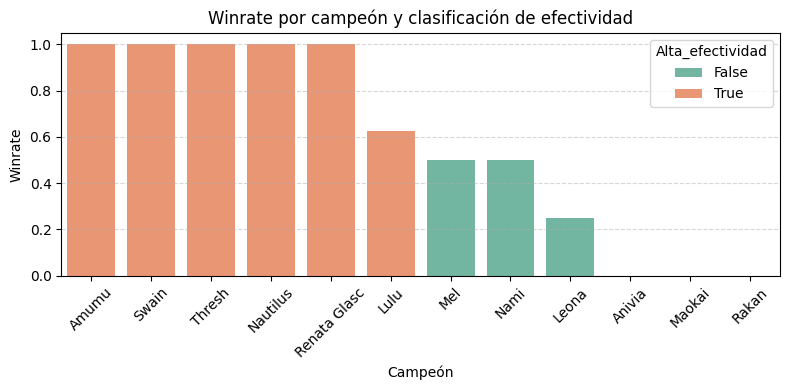

In [84]:

plt.figure(figsize=(8,4))
sns.barplot(data=winrate_por_campeon.sort_values("Victoria", ascending=False),
            x="Campeón", y="Victoria", hue="Alta_efectividad", dodge=False, palette="Set2")
plt.xticks(rotation=45)
plt.title("Winrate por campeón y clasificación de efectividad")
plt.ylabel("Winrate")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [85]:
control_vision_support = df['Wards por M'].mean()
print(f"Promedio general de wards por minuto: {control_vision_support:.2f}")

Promedio general de wards por minuto: 0.92


In [86]:
vision_duo = df[df['Duo'] == 1]['Wards por M'].mean()
print(f"Wards por minuto en partidas dúo: {vision_duo:.2f}")

Wards por minuto en partidas dúo: 0.96


In [87]:
vision_lulu = df[df['Campeón'] == 'Lulu']['Wards por M'].mean()
vision_leona = df[df['Campeón'] == 'Leona']['Wards por M'].mean()
vision_mel = df[df['Campeón'] == 'Mel']['Wards por M'].mean()

print(f"Lulu: {vision_lulu:.2f}, Leona: {vision_leona:.2f}, Mel: {vision_mel:.2f}")

Lulu: 0.86, Leona: 1.02, Mel: 0.88


| Nivel de juego          | Wards por minuto (total) |
| ----------------------- | ------------------------ |
| Profesional / alto elo  | 1.0 – 1.5+               |
| Bueno en ranked         | 0.8 – 1.2                |
| Promedio bajo           | 0.5 – 0.7                |
| Pobre control de visión | < 0.5                    |


<ipython-input-89-9449a2c53a88>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Duo', y='Assists', palette='Set2')


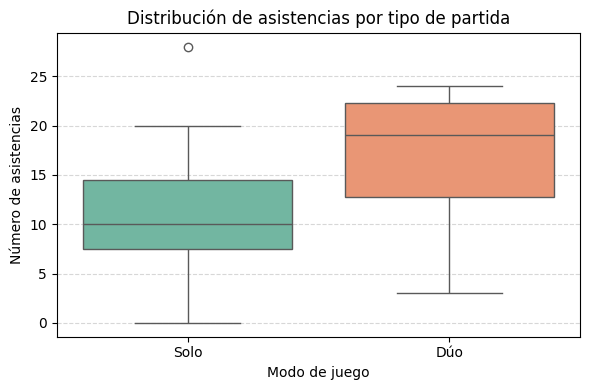

In [89]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Duo', y='Assists', palette='Set2')
plt.xticks([0,1], ['Solo', 'Dúo'])
plt.title('Distribución de asistencias por tipo de partida')
plt.ylabel('Número de asistencias')
plt.xlabel('Modo de juego')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

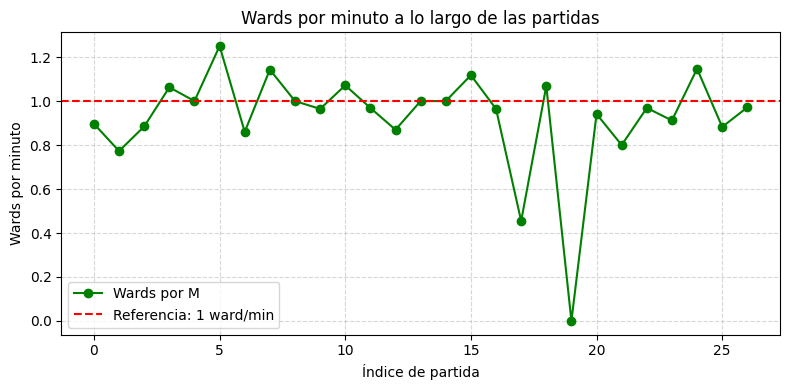

In [90]:
plt.figure(figsize=(8,4))
df['Wards por M'].plot(marker='o', color='green')
plt.title("Wards por minuto a lo largo de las partidas")
plt.xlabel("Índice de partida")
plt.ylabel("Wards por minuto")
plt.axhline(1, color='red', linestyle='--', label='Referencia: 1 ward/min')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

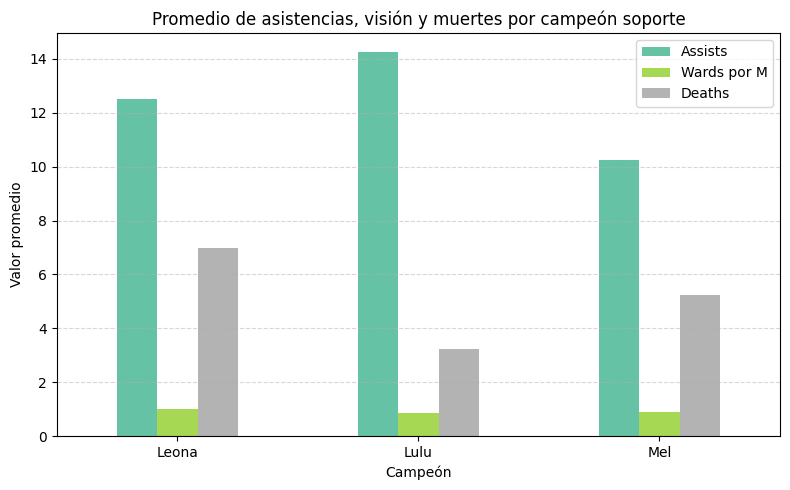

In [94]:
soportes = df[df['Campeón'].isin(['Lulu', 'Leona', 'Mel'])]
resumen = soportes.groupby('Campeón')[['Assists', 'Wards por M', 'Deaths']].mean()

resumen.plot(kind='bar', figsize=(8,5), colormap='Set2')
plt.title("Promedio de asistencias, visión y muertes por campeón soporte")
plt.ylabel("Valor promedio")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

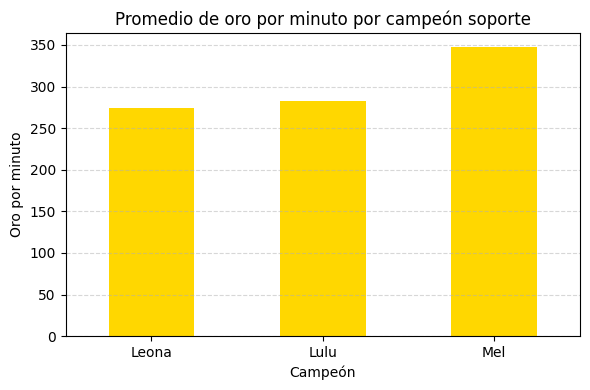

In [96]:
oro_por_minuto = soportes.groupby('Campeón')['Oro por Minuto'].mean()
oro_por_minuto.plot(kind='bar', color='gold', figsize=(6,4))
plt.title("Promedio de oro por minuto por campeón soporte")
plt.ylabel("Oro por minuto")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Destacados
De 16 partidas jugadas en DUO, solo perdio 3, ahora por el lado del ranking que de las mismas 16 partidas solo en 4 no estuvo en el top 3